<a href="https://colab.research.google.com/github/Lourdes-Tolotto/ML/blob/main/Clase2_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Clase 2, ejercicio 1 


In [ ]:
import pandas as pd
import numpy as npa
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stt

In [ ]:
from google.colab import files
#uploaded = files.upload()



In [ ]:
url = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv'
df_camas = pd.read_csv(url)
#df_camas.info()
print(df_camas.describe())
print()
delete_cols = ["fecha", "aprehendidos"] # se eliminan los features no utiles
df_camas = df_camas.drop(columns = delete_cols)
print(df_camas.shape)
print()
fils, cols = df_camas.shape        # nro de fils y cols
features = df_camas.columns.values
print(features)


       confirmados      activos  recuperados    decesos  descartados  \
count    88.000000    88.000000    88.000000  88.000000    88.000000   
mean    944.977273   403.738636   516.238636  25.000000  2007.647727   
std     741.951512   377.382561   369.502430  16.613248   951.537510   
min     106.000000    29.000000    71.000000   6.000000   574.000000   
25%     422.000000   201.250000   164.000000  13.000000  1159.250000   
50%     706.500000   238.000000   502.000000  20.000000  1999.500000   
75%    1262.750000   487.750000   742.250000  32.750000  2794.500000   
max    3012.000000  1512.000000  1434.000000  66.000000  3738.000000   

       sospechosos  contencion_psicologica  monitoreo_epidemiologico  \
count    88.000000               88.000000                 88.000000   
mean    157.613636              407.295455               1360.386364   
std     101.144080               21.174241                289.810181   
min      22.000000              342.000000               1014.0

In [ ]:
from scipy.stats import normaltest

# Se analiza un conjunto de datos para determinar si tienen distribucion normal

def print_hist(data, data_name, ax):
    
    # Con este criterio se asume que los datos tienen una distribucion normal
    # si p_value>0.5
    stat, p_value = normaltest(data)
    
    if p_value > 0.05: 
      normal = True
      sns.histplot(data, kde=True, ax=ax, color='green')
      ax.set_title(data_name + ' (Posee D. Normal)')
    else: 
      normal = False
      sns.histplot(data, kde=True, ax=ax, color='red')
      ax.set_title(data_name + ' (NO Posee D. Normal)')
    
    return normal


In [ ]:
# Imprime cada feature del dataset informando si tiene distribucion normal o no

def DF_analysis(df, fig_fils, fig_cols):
    
    features = df.columns
    fig, axes = plt.subplots(fig_fils, fig_cols, figsize=(15,15))
    axes = axes.ravel()

    count = 0

    for feature, ax in zip(features, axes):
        if print_hist(df[feature], feature, ax)==True : count = count + 1

    print("Features con distribución normal: ",count)

    fig.suptitle('Analisis de cada feature')
    plt.show()

Features con distribución normal:  0


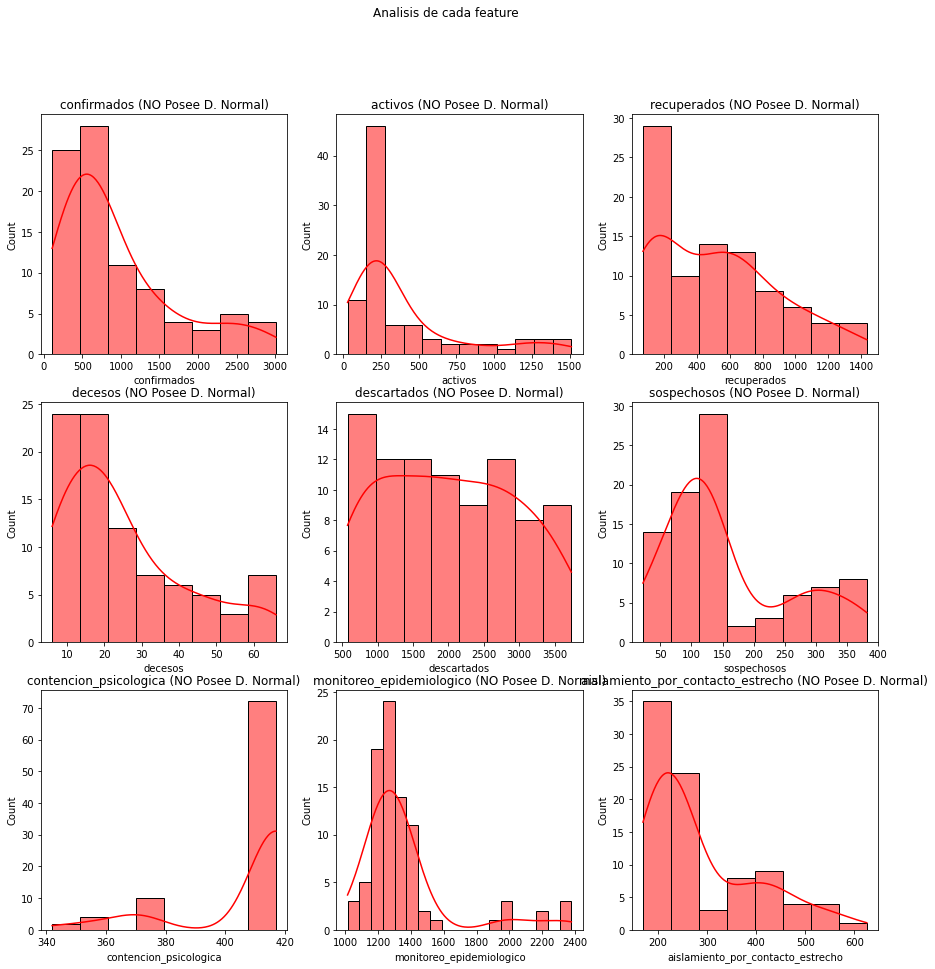

In [ ]:
# Se muestra cada feature en un histograma y se analiza si poseen 
#distribucion normal
DF_analysis(df_camas, 3, 3)


(88, 7)
['confirmados' 'activos' 'recuperados' 'decesos' 'descartados'
 'sospechosos' 'contencion_psicologica' 'monitoreo_epidemiologico'
 'aislamiento_por_contacto_estrecho']

['confirmados' 'recuperados' 'decesos' 'descartados' 'sospechosos'
 'contencion_psicologica' 'aislamiento_por_contacto_estrecho']

Features con distribución normal:  0


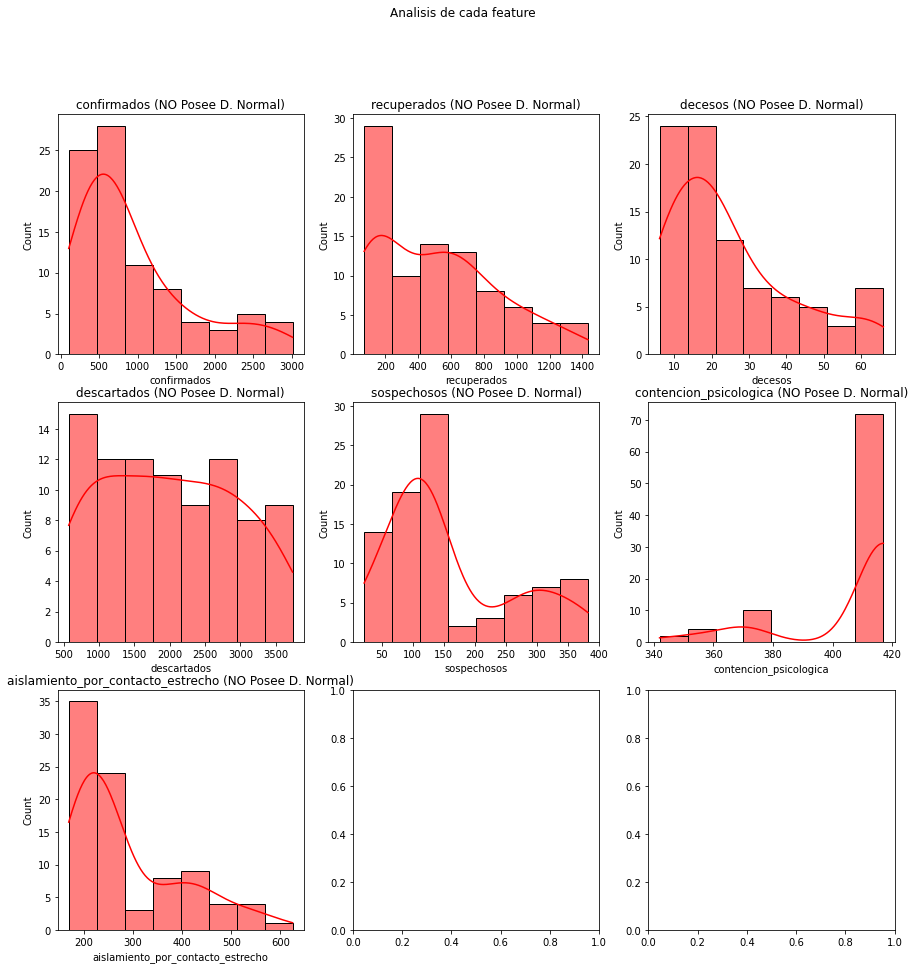

In [ ]:
from scipy.stats import skew

df_aux = pd.read_csv(url)
df_aux.drop(["fecha", "aprehendidos"], axis = 1, inplace = True)

# Se eliminan las features que no aportan informacion relevante

for i in range(1,cols):
  if skew(df_camas[features[i]]) > 1.65: 
   df_aux.drop(features[i], axis = 1, inplace = True)

print(df_aux.shape)
features_aux = df_aux.columns.values

# Se observan los histogramas del resto de los feautures
print(features)
print()
print(features_aux)
print()

DF_analysis(df_aux, 3, 3)